# FONCTIONS PERSONNALISEES R-NIAYES 2040

### 1- Les fonctions de recherches et de créations de répertoire de données

- function 1A : création de dossiers voulus lorsqu'ils n'existent pas

In [1]:
create_folder=function(x,path=getwd()){
    
        for (f in x){
            
            folder<-file.path(path, f)

        if (!dir.exists(folder)){
            dir.create(folder)
            print(paste(f,"has been created!"))
        } else {
        print(paste(folder,"already exists!"))}
        }
}

- function 1B :rechercher et extraire tous les fichiers

- function 1C : rechercher les fichiers voulu dans le répertoire initial

In [1]:
find_myfiles=function(files=NULL,ext=NULL,
                      patt=NULL,dir=NULL){
    
    if (is.null(dir)){dir<-getwd()}
    setwd(dir)
    
    #tous les dossiers du repertoire de travail
    all_work_dir<-list.dirs(path = ".",
    full.names = TRUE, recursive = TRUE)

    #list des chemins des fichiers recherchés
    list_path<-c()
    
   #si le nom du fichier est précisé
    if (!is.null(files)){

        for (file in files){
            
            ##si l'extension du fichier est donnée
             if(!is.null(ext)){
                 file<-tools::file_path_sans_ext(file)
                 
                 files_path<-reader::find.file(paste(file,
                 ext,sep=""),dir=dir,dirs=all_work_dir)

                 #si un pattern est donné
                 if (!is.null(patt)){
                     files_path<-Filter(function(x) grepl(paste(ext,
                                "$",sep=""), x),
                                list.files(files_path,
                                pattern = patt))}
                 
                 list_path<-c(list_path,files_path)
             }
            
            ##si l'extension n'est pas donnée 
            #et que l'extension n'est pas dans le nom
            
            if(is.null(ext) & (tools::file_ext(file)=="")){
                print("Ajoutez l'extension au nom du fichier!!")
                print("Si le problème, 
                persiste alors le fichier n'existe probablement 
                pas dans ce répertoire!!")
                  
                 }
            ##si l'extension n'est pas donnée 
            #et que l'extension est dans le nom
            if(is.null(ext) & (tools::file_ext(file)!="")){

                 ext<-tools::file_ext(file)
                 files_path<-reader::find.file(file,
                            dir=dir,dirs=all_work_dir)
                
                #si un pattern est donné
                 if (!is.null(patt)){
                     files_path<-list.files(files_path,
                                 pattern = patt)
                 }
            }
        }
    list_path<-c(list_path,files_path)
    }
        
           #si le nom du fichier n'est pas précisé
    if(is.null(files)){
        
        print("pas de nom fichier")
        ##si l'extension du fichier n'est pas donnée
        if(is.null(ext) & (!is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di,pattern = patt)
                list_path<-c(list_path,p)}
            }
            
        if(is.null(ext) & (is.null(patt))){
            for (di in all_work_dir){
                p<-list.files(di)
                list_path<-c(list_path,p)}
            }
        
        ##si l'extension du fichier est donnée
        if(!is.null(ext) & (!is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di,pattern = patt)
                
                p<-Filter(function(x) grepl(paste(ext,
                                    "$",sep=""), x),p)
                          
                list_path<-c(list_path,p)
            }
                          }
            
        if(is.null(ext) & (is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di)
                p<-Filter(function(x) grepl(paste(ext,
                                    "$",sep=""), x),p)
                          
                list_path<-c(list_path,p)}
            }
                          list_path}
                          }

- function 1D : copier ou déplacer des données dans les bons dossiers à partir des sorties brutes

In [3]:
 get_file=function(current_folder,
                   new_folder,ext=".csv",
                   patt=NULL,methode="copy"){
    
     list_of_files <- list.files(current_folder,
                                 ext, pattern=patt)
     
     if (methode=="copy"){ 
         file.copy(file.path(current_folder,
                             list_of_files), new_folder)
         
     }else if (methode=="move"){
         filesstrings::file.move(file.path(current_folder,
                                           list_of_files),
                                           new_folder)
     }
 }

- function 1E : récupérer un chemin à partir d'un fichier

### 2- Les fonctions de préparations et prétraitement des données

- function 2A : lire un fichier csv en détectant automatiquement le séparateur

In [4]:
rcsv_sep=function(file_path){
    L <- readLines(file_path, n = 1)
    if (grepl(";", L)) read.csv2(file_path) else read.csv(file_path)
    }

- function 2B : conversion des coordonnées de l'image de l'index en cooordonnées X-Y

In [5]:
ind2sub = function(Raster, Image_Index) {
    
  c <- ((Image_Index - 1) %% Raster@ncols) + 1
  r <- floor((Image_Index - 1) / Raster@ncols) + 1
  my_list <- list("col" = c, "row" = r)
  return(my_list)
}

- function 2C: extraction des coordonnées des pixels du raster correspondant à une zone définie par un vecteur

In [6]:
extract_pixels_coordinates = function(PathRaster,PathVector){

  #lire le fichier vectoriel
    Shp_Path <- dirname(PathVector)
    Shp_Name <- tools::file_path_sans_ext(basename(PathVector))
    Shp_Crop <- rgdal::readOGR(Shp_Path,Shp_Name)

    #Shp_Crop<-dplyr::distinct(Shp_Crop,DESIGATION,
    #.keep_all = TRUE)
    
    #lire les informations raster
    Raster <- raster::raster(PathRaster, band = 1)
    
  #extraire les coordonnées des pixels du raster 
    #en fonction du vecteur
    XY <- raster::cellFromXY(Raster,Shp_Crop)
    
  #pour chaque polygone
    ColRow <- list()
    NamePlot <- c()
    for (i in 1:length(XY)){
        ColRow[[i]] <- ind2sub(Raster,XY[[i]])
  }
  return(ColRow)
}

- function 2D: récupération des noms des zones dont les coordonnées ont été et extraites

In [7]:
getNamePlot = function(PathVector,Field){
    
  #lire le fichier vectoriel
  Shp_Path <- dirname(PathVector)
  Shp_Name <- tools::file_path_sans_ext(basename(PathVector))
  Shp_Crop <- rgdal::readOGR(Shp_Path,Shp_Name)
  NamePlot <- c()

  #récupérer les noms des parcelles
  for (i in 1:length(Shp_Crop)){
    NamePlot[i] <- as.character(Shp_Crop[[Field]][i])
  }
  return(NamePlot)
}

- function 2E: extraction de bandes de pixels clairsemés dans un cube de données d'image

In [8]:
extract.big_raster = function(ImPath, rowcol, MaxRAM=.50){

  if(!is.data.frame(rowcol)){
    rowcol <- as.data.frame(rowcol)
  }

  if(!all(c('row', 'col') %in% colnames(rowcol))){
    warning('Columns row,col not found in rowcol argument.
    The two first columns are considered as row, 
    col respectively.')
    colnames(rowcol)[1:2]= c('row', 'col')
  }

  metarast <- raster::raster(ImPath)
  # updated raster package: do not use brick with 2D raster
  if (dim(metarast)[3]>1){
    rasterInfo <- raster::brick(ImPath)
  } else{
    rasterInfo <- metarast
  }

  # nbytes = as.numeric(substring(dataType(rasterInfo), 4, 4))
  # stars converts automatically values to numeric
  nbytes = 8
  ImgSizeGb = prod(dim(rasterInfo))*nbytes/2^30
  LineSizeGb = prod(dim(rasterInfo)[2:3])*nbytes/2^30
  LinesBlock = floor(MaxRAM/LineSizeGb)

  #row in block number
  rowcol$rowInBlock = ((rowcol$row-1) %% LinesBlock)+1
    
  #block number
  rowcol$block=floor((rowcol$row-1)/LinesBlock)+1 
    
  #sample index to reorder result
  rowcol$sampleIndex = 1:nrow(rowcol)  

  sampleList = lapply(unique(rowcol$block),
  function(iblock){
      rc = rowcol[rowcol$block==iblock,]
      rr = range(rc$row)
      nYSize = diff(rr)+1
      nXSize = max(rc$col)
      
    # stars data cube dimension order is x*y*band
    ipix_stars = (rc$rowInBlock-min(rc$rowInBlock))*
                  nXSize+rc$col
      
    values = stars::read_stars(ImPath, 
            RasterIO =list(nXSize=nXSize,
                           
    nYOff=rr[1], nYSize=nYSize),proxy = FALSE)[[1]]
      
    values = matrix(values, nrow=nYSize*nXSize)
    res = cbind(rc$sampleIndex, values[ipix_stars, ])
    rm('values')
    gc()
    return(res)
  })

  samples = do.call(rbind, sampleList)
  samples = samples[order(samples[,1]),2:ncol(samples)]

  return(samples)
}

- function 2F: récupération de la résolution à partir du nom du fichier ou de son contenu

In [9]:
reso_from_fileName=function(file_name,path=getwd()){
    
    #on découpe le nom du fichier en séparant par "_" 
    #et on récupère le caratère à la position de la résolution
    
    split_list<-
    strsplit(tools::file_path_sans_ext(file_name),
    "_")
    
    split_list<-as.list(split_list[[1]])
    split_list<-split_list[[length(split_list)]]
}

- function 2G: associer les cellules à leurs stations selon la résolution

In [10]:
station_in_cell=function(path='data/rasters',dir=file.path(getwd())){

    shap_path<-file.path(dir,path)
     
    #path_station_shp<- list.files(shap_path,
    #pattern = ".shp$",full.names = TRUE)
    
    #Stations_shp<- sf::read_sf(path_station_shp)
    
    #Stations_shp<-dplyr::distinct(Stations_shp,
    #DESIGATION,.keep_all = TRUE)
    
    #sf::st_write(Stations_shp, 
    #paste(shap_path,basename(path_station_shp),sep=""))
    
        ##emplacement des shapes
    PathVector<-list.files(shap_path,pattern = ".shp$")
    PathVector<-unlist(unique(lapply(PathVector,
    function(x){file.path(shap_path,PathVector)})))
    
        ##emplacement des rasters
    ListRasters <- list.files(shap_path,
                   pattern = ".tif$")
    
    PlotCell <- list()
    
    ###identification des cellules-station 
    ###selon le raster de la résolution
    
    for (NameRaster in ListRasters){

              #obtenir le nom du raster
          PathRaster <- file.path(shap_path,NameRaster)

              #obtenir les coordonnées en pixels 
              #correspondant aux vecteurs
          coords <- extract_pixels_coordinates(PathRaster,
                                               PathVector)
          
          #coords <- na.omit.list(coords)

              #obtenir le nom du tracé correspondant
          Field <- 'DESIGATION'
          NamePlot <- getNamePlot(PathVector,Field)

              #extraire les informations du raster
          ExtractIm <- c()
          for (FieldPlot in 1:length(coords)){
            ExtractIm[FieldPlot] <- extract.big_raster(PathRaster,
                                    coords[[FieldPlot]])
          }

              #produire une table de données
          PlotCell[[NameRaster]] <- data.frame('stations' = 
                                               NamePlot,
                                               'cellules'= 
                                               ExtractIm)

          write.table(x = PlotCell[[NameRaster]],
          file = file.path(shap_path,
          paste(tools::file_path_sans_ext(NameRaster),
          '.csv',sep = '')),
          quote = FALSE,row.names = FALSE,sep = ';')
    }
}

- function 2H: extraction des observations

In [11]:
extract_obs=function(obs_col="piezostation",
                     reso_min="300.0",
                     dir_simul="data/simulations",
                     dir_raster="data/rasters"){
    
    list_simul200<-list.files(dir_simul,
                   pattern =reso_min)
    q=0
    newListSimul<-c()
    for (n in (1:length(list_simul200))){
        if (max(rcsv_sep(file.path("data/simulations",
            list_simul200[n]))$date)=='2016-12-21 00:00'){
            newListSimul<-c(newListSimul,list_simul200[n])
        }
    }
        newListSimul<-unique(newListSimul)
        list_simul200<-newListSimul
    
    Path_simul200<-file.path(dir_simul,
    list_simul200[sample(1:length(list_simul200),1)])
    piezostation<- rcsv_sep(Path_simul200)

    piezostation<-subset(piezostation,
    select=c("id","date",obs_col))
    
    piezostation <- transform(piezostation,
    piezostation = as.numeric(piezostation))
    
    piezostation <- transform(piezostation, 
    id = as.numeric(id))
    
    #piezostation$date <- as.POSIXct(piezostation$date,
    #tz='GMT')
    
    piezostation$date <-
    stringr::str_sub(piezostation$date,
    1,nchar(piezostation$date)-6)
    
    piezostation$date <-
    lubridate::parse_date_time(piezostation$date,
    orders = c("ymd","dmy","mdy"),tz="GMT")

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
                        list.files(dir_raster,
                        pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                        Filter(function(x) grepl(reso_min, x),
                        ListIDcell)),
                        header =TRUE,sep=";",dec=",")
    
    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE","BENDIOUGA","TEBENE Pz")
    stations<-stations[!(stations$stations %in% s_out),]
                        
    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
    summarize(zone = paste(sort(unique(stations)),
            collapse="_"))
    piezostation <-left_join(piezostation,
            stations, by = c("id" = "cellules"))
    
    piezostation <-na.omit(piezostation)
    
    names(piezostation)[names(piezostation) == 'zone']<- 
    "stations"
    
    piezostation <-dplyr::select(piezostation,-starts_with("id"))
    
    write.csv2(piezostation,file.path('data','observations',
                                      "piezostation.csv"))

    #return(piezostation[which((piezostation$date<"2016-01-01") & 
                              #piezostation$piezostation>0),])
    
    #return(piezostation[which((piezostation$date<"2013-01-01") & 
                              #piezostation$piezostation>0),])
    
    return(piezostation[which((piezostation$date>="2013-01-01") & 
                              (piezostation$date<"2016-01-01") &
                              piezostation$piezostation>0),])
}

- function 2I: mise en forme des données de simulations

In [12]:
#list_simul<-list.files("simulations",pattern =reso)

form_simul=function(reso,simul_name,simul_col="piezo",
          dir_simul="data/simulations",
          dir_raster="data/rasters"){

    Path_simul<-file.path(dir_simul,simul_name)
    piezo<- rcsv_sep(Path_simul)

    piezo<-subset(piezo,select=c("id","date","piezo"))
    piezo<- transform(piezo, piezo = as.numeric(piezo))
    piezo<- transform(piezo, id = as.numeric(id))
    piezo$date <-stringr::str_sub(piezo$date,1,
                 nchar(piezo$date)-6)
    piezo$date <-lubridate::parse_date_time(piezo$date,
                orders = c("ymd","dmy","mdy"),tz="GMT")
    #piezo$date <- as.POSIXct(piezo$date,tz='GMT')

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
                list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso, x),
                ListIDcell)),header =TRUE,sep=";",dec=",")
    
    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")
    
    stations<-stations[!(stations$stations %in% s_out),]
   
    library(dplyr)              
    piezo<-left_join(piezo, stations, 
           by = c("id" = "cellules"))
    
    stations<-stations %>% group_by(cellules) %>% 
    summarize(zone = paste(sort(unique(stations)),
                           collapse="_"))

    piezo<-left_join(piezo, stations, 
                     by = c("id" = "cellules"))
    
    names(piezo)[names(piezo) == 'id']<- "cellules"

    #return(piezo[which((piezo$date<"2016-01-01")& 
                       #piezo$cellules>-1),])
    
    #return(piezo[which((piezo$date<"2013-01-01")& 
                       #piezo$cellules>-1),])
    
    return(piezo[which((piezo$date>="2013-01-01")& 
                       (piezo$date<"2016-01-01")&
                       piezo$cellules>-1),])
}

- function 2J: créer une liste de charactère avec un pattern

In [13]:
string_pat=function(racine,index){
    listName<-c()
    for (i in index){
        listName<-c(listName,paste(racine,i))
    }
    return(listName)
}

- function 2K:lecture et fusion de multiple tableaux csv

In [14]:
multMerge = function(mypath=NULL){
    
    if (is.null(mypath)){
        print("donnez une liste de chemins de tableaux 
            ou le chemin du repertoire des tableaux")
    }
    
    if (length(mypath)==1){
        
        filenames <- list.files(path = mypath, 
                                full.names = TRUE)
        
    }
    if(length(mypath)>1){
        
        filenames<-mypath
        
        datalist = 
        lapply(filenames,
               function(x){
                   L <- readLines(x, n = 1)
                   if (grepl(";", 
                   L)) read.csv2(x) else read.csv(x)})

    Reduce(function(x,y) {merge(x, y, all = TRUE)},
           datalist)
    }
}

**Vignette 2**

***META-FONCTION '' prep_data() '' :***

Cette fonction à pour but d'identifier les cellules du raster et d'associer chaque station à la cellule dans laquelle elle se trouve puis de formater les tables de données.

### 3- Les fonctions de calcule des indicateurs de précisions du modèle

- function 3A: calculer du poids en station d'une cellule sur la zone d'étude

In [15]:
poids_cell=function(data,col_num="zone",
                    col_denom="cellules"){
    
    poids<-c()
    
    for (n in data$zone){
    n=length(as.list(strsplit(n, '_')[[1]]))
    d=length(unique(data$cellules))
    
    poids<- c(poids,(n/d))}
    poids}

- function 3B: aggréger les erreur de mesure par cellule

In [16]:
agg_cell_error=function(data,FUN=sum,
                        col_obs="piezostation",
                        col_simul="piezo",
                        group="cellules"){
    
    data["error"]<-(data[col_simul]-data[col_obs])
    data["error_squared"]<-(data$error)^2
    
    error_agg<-aggregate(data$error_squared,
    by = list(data$cellules,data$date),
                         FUN = FUN)
    
    names(error_agg)[names(error_agg) == 'Group.1']<- 
    "cellules"
    
    names(error_agg)[names(error_agg) == 'Group.2']<- 
    "date"
    
    data$error<-left_join(data, error_agg,
    by = c("cellules" = "cellules","date"="date"))$x
    
    data<-dplyr::distinct(data, cellules,date,
                          .keep_all = TRUE)
    data
}

- function 3C: aggreger les données de stations par cellule

In [17]:
agg_obs=function(data,FUN=mean,col_obs="piezostation"){
    
    agg<-aggregate(data[col_obs],
                   by = c(data["cellules"],data["date"]),
                   FUN = FUN,na.action = na.omit)
    
    names(agg)[names(agg) == 'Group.1']<- "cellules"
    names(agg)[names(agg) == 'Group.2']<- "date"
    agg
}

- function 3D: calculer le **RMSE moyen (niveau cellule)**

On représente les valeurs d'observation d'une cellule par la moyenne des observations des stations de cette dernière puis on fait la moyenne des RMSE des cellules.

     Avantages:

On est à pas à faire un choix arbitraire de station pour avoir une valeur de comparasion dans le cas où il n'y a pas qu'une station dans la cellule. Et on ne risque pas de biais dû à une surreprésentation d'une zone dans le RMSE.
On a donc à coup autant d'observations que de valeurs simulée pour chaque cellule quelle que soit la résolution.

    Inconvénient:

La façon dont Ocelet nous rends une valeurs pour la cellule fait que si les valeurs observées entre les stations de la même cellule sont assez eloignées les une des autres, une moyenne représenterait mal la valeur qu'on attends qu'Ocelet nous prédise. Puisque Ocelet fait une prédiction pour toutes les stations de la cellule puis selectionne aléatioirement une des prédictions pour représenter cette dernière. Ainsi même si le modèle était très bon, à mois que les valeurs des stations soient identiques ou proche, avec une moyenne on est sûr d'avoir une erreur plus élevée.

In [18]:
rmse=function(obs,simul,reso="200.0"){
    
    obs<-obs
    simul<-simul
    
    #jonction entre table d'observations et de simulations
    df<-dplyr::left_join(obs, simul,
        by = c("stations" = "stations","date"="date"))
    

    #moyenne des observations de stations par cellule
    mean_stations<-agg_obs(df,mean)

    
    #association de la moyennes des observations 
    #aux stations correspondantes
    df$piezostation<-left_join(df, mean_stations,
    by = c(cellules = "cellules",
           date="date"))$piezostation.y
    
    df<-na.omit(df)
    df<-dplyr::distinct(df, stations,date,
                        .keep_all = TRUE)


    #table pour contenir les RMSE calculés
    r<-data.frame(row.names = c(unique(df$cellules),
                                "mean_indice",
                                "Niayes"))

    #calcule du RMSE moyen
    for (cel in unique(df$cellules)){
        
        d<-df[which(df$cellules==cel),]
        r[as.character(cel),"rmse"]<-
        Metrics::rmse(d$piezostation,d$piezo)
    }
    
    dir_raster<- 'data/rasters'

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
             list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso,
                x),ListIDcell)),header =TRUE,
                sep=";",dec=",")

    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")

    stations<-stations[!(stations$stations %in% s_out),]
    stations$cellules<-as.character(stations$cellules)

    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
      summarize(zone = paste(sort(unique(stations)),
                             collapse="_"))

    r<-left_join(r %>%
              mutate(cellules=rownames(r)),
              stations,
              by = 'cellules')
    
    r[which(r$cellules=="Niayes"),"zone"]<-"Niayes"
    r[which(r$cellules=="mean_indice"),"zone"]<-"mean_indice"
    
    r[which(r$cellules=="mean_indice"),"rmse"]<-
    mean(r[(r$cellules %in% unique(stations$cellules)),
           "rmse"],na.rm=TRUE)
    
    r[which(r$cellules=="Niayes"),"rmse"]<-
            Metrics::rmse(df$piezostation,df$piezo)
    r
}

In [19]:
rmse_agg_dgpz=function(obs,simul,reso="200.0"){
    
    obs<-obs
    simul<-simul
    
    #jonction entre table d'observations et de simulations
    df<-dplyr::left_join(obs, simul,
        by = c("stations" = "stations",
               "date"="date"))
    

    #moyenne des observations de stations par cellule
    mean_stations<-agg_obs(df,mean)

    
    #association de la moyennes des observations 
    #aux stations correspondantes
    df$piezostation<-left_join(df, mean_stations,
    by = c(cellules = "cellules",
           date="date"))$piezostation.y
    
    df<-na.omit(df)
    df<-dplyr::distinct(df, stations,date,
                        .keep_all = TRUE)


    #table pour contenir les RMSE calculés
    r<-data.frame(row.names = c(unique(df$cellules),
                                "mean_indice",
                                "Niayes"))

    #calcule du RMSE moyen
    for (cel in unique(df$cellules)){
        
        d<-df[which(df$cellules==cel),]
        r[as.character(cel),
        "rmse_agg_dgpz"]<-Metrics::rmse(d$piezostation,
                                              d$piezo)
    }
    
    dir_raster<- 'data/rasters'

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
             list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso,
                x),ListIDcell)),header =TRUE,
                sep=";",dec=",")

    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")

    stations<-stations[!(stations$stations %in% s_out),]
    stations$cellules<-as.character(stations$cellules)

    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
      summarize(zone = paste(sort(unique(stations)),
                             collapse="_"))

    r<-left_join(r %>%
              mutate(cellules=rownames(r)),
              stations,
              by = 'cellules')
    
    r[which(r$cellules=="Niayes"),"zone"]<-"Niayes"
    r[which(r$cellules=="mean_indice"),"zone"]<-"mean_indice"
                                   
    agg_dgpz<-unlist(r[grepl('DGPZ', r$zone),
                "rmse_agg_dgpz"])
                   
    no_dgpz<-unlist(r[!grepl('DGPZ', r$zone),
               "rmse_agg_dgpz"])
                   
    r[which(r$cellules=="mean_indice"),"rmse_agg_dgpz"]<-
    mean(no_dgpz,mean(agg_dgpz,na.rm=TRUE),
         na.rm=TRUE)
    
    r[which(r$cellules=="Niayes"),"rmse_agg_dgpz"]<-
    mean(r[(r$cellules %in% unique(stations$cellules)),
           "rmse_agg_dgpz"],na.rm=TRUE)

    r
}

- function 3E: calculer la **Moyenne des RMSE moyen (niveau station puis cellule)**

On prends la moyenne des RMSE moyen obtenus en faisant la moyenne des RMSE de chaque station de la cellule).

    Avantages:

Le problème de choix de valeurs de comparasion n'en est plus observation Vs Simulation. On a pas de biais de regroupement spatial à gerer.


    Inconvénient:
    
Le même problème du premier indicateur se pose puisque nous représentons le RMSE d'une cellule par le RMSE moyen de ses stations; Ce qui revient grossièrement à considérer l'erreur de prédiction pour cette cellule comme l'erreur moyen des différentes stations par rapport à la valeur retenue dans la simulation0

Ce qui fait dans un modèle parfait par exemple, si les valeurs observées des stations sont assez eloignées les unes des autres, l'erreur mesurée pour la station la plus éloignée de la station prédicte sera exarcerbé et l'erreur moyen le sera aussi (la moyenne est sensible aux extrême et par construction le RMSE exacerbe les valeurs aberrantes)

In [20]:
averaged_rmse=function(obs,simul,reso="200.0"){
    
    
    #jonction entre table d'observations et de simulations
    df<-left_join(obs, simul,
        by = c("stations" = "stations",
               "date"="date"))
    

    #calcul de l'error (ecart entre observation et simulation)
    df$error<-(df$piezo-df$piezostation)
    df<-na.omit(df)

    #table pour contenir les RMSE calculés
    r<-data.frame(row.names = c(unique(df$cellules),
       "mean_indice","Niayes"))
    
    #calcul de la moyenne de RMSE moyen
    #list()
    rlist2=c()
    for (cel in unique(df$cellules)){

        d<-df[which(df$cellules==cel),]

        rlist=c()
        for (id in unique(df$stations)){
            
            ds<-d[which(d$stations==id),]
            ri<- Metrics::rmse(ds$piezostation,
                               ds$piezo)
            
            rlist <- c(rlist, ri)
            rlist <- na.omit(rlist)
            rlist2 <- c(rlist2, rlist)
        }
        r[as.character(cel),"averaged_rmse"]<-
        mean(rlist,na.rm=TRUE)
    }
    
    
    dir_raster<- 'data/rasters'

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
             list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso,
                x),ListIDcell)),header =TRUE,
                sep=";",dec=",")

    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")

    stations<-stations[!(stations$stations %in% s_out),]
    stations$cellules<-as.character(stations$cellules)

    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
      summarize(zone = paste(sort(unique(stations)),
                             collapse="_"))

    r<-left_join(r %>%
              mutate(cellules=rownames(r)),
              stations,
              by = 'cellules')
    
    r[which(r$cellules=="Niayes"),"zone"]<-"Niayes"
    r[which(r$cellules=="mean_indice"),"zone"]<-"mean_indice"
                                   
    agg_dgpz<-unlist(r[grepl('DGPZ', r$zone),
                "averaged_rmse"])
                   
    no_dgpz<-unlist(r[!grepl('DGPZ', r$zone),
               "averaged_rmse"])
                   
    r[which(r$cellules=="mean_indice"),"averaged_rmse"]<-
    mean(no_dgpz,mean(agg_dgpz,na.rm=TRUE),
         na.rm=TRUE)
    
    r[which(r$cellules=="Niayes"),"averaged_rmse"]<-
                                   mean(rlist2,na.rm=TRUE)
    r
}

- function 3F: calculer la **Moyenne  Pondérée des RMSE moyen (niveau cellule)**

On pondère les RMSE moyen de chaque cellule par le poids de cette station en termes de station sur l'ensemble des stations de la zone d'étude pour calculer la moyenne.

    Avantages:

    Inconvénient:


In [21]:
weighted.mean_rmse=function(obs,simul,reso="200.0"){

    
    #jonction entre table d'observations et de simulations
    df<-left_join(obs, simul,
        by = c("stations" = "stations","date"="date"))

    #calcul de l'error (ecart entre observation et simulation)
    df$error<-(df$piezo-df$piezostation)
    df<-na.omit(df)

    #table pour contenir les RMSE calculés
    r<-data.frame(row.names = c(unique(df$cellules),
                                "mean_indice",
                                "Niayes"))

    #poids station par cellule
    df['poids_cellule']<-poids_cell(df)

    #calcul du RMSE
    rlist2=c()
    for (cel in unique(df$cellules)){

        d<-df[which(df$cellules==cel),]
        p<-unique(d[which(d$cellules==cel),
                    "poids_cellule"])
        
        rlist=c()
        rlist2=c()
        
        for (id in unique(d$stations)){

            ds<-d[which(d$stations==id),]
            ri<- Metrics::rmse(ds$piezostation,ds$piezo)
            rlist <- c(rlist, ri)
            #rlist2 <- c(rlist2, ri*p)
        }
        
        rlist2 <- c(rlist2, rlist)
        r[as.character(cel),"weighted.mean_rmse"]<-
        mean(rlist,na.rm=TRUE)*p
    }
    
    
    
    dir_raster<- 'data/rasters'

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
             list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso,
                x),ListIDcell)),header =TRUE,
                sep=";",dec=",")

    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")

    stations<-stations[!(stations$stations %in% s_out),]
    stations$cellules<-as.character(stations$cellules)

    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
      summarize(zone = paste(sort(unique(stations)),
                             collapse="_"))

    r<-left_join(r %>%
              mutate(cellules=rownames(r)),
              stations,
              by = 'cellules')
    
    r[which(r$cellules=="Niayes"),"zone"]<-"Niayes"
    r[which(r$cellules=="mean_indice"),"zone"]<-"mean_indice"
                                   
    agg_dgpz<-(r[grepl('DGPZ', r$zone),
                "weighted.mean_rmse"])
                   
    no_dgpz<-(r[!grepl('DGPZ', r$zone),
               "weighted.mean_rmse"])
                   
    r[which(r$cellules=="mean_indice"),
      "weighted.mean_rmse"]<-mean(na.omit(no_dgpz),
        mean(agg_dgpz,na.rm=TRUE),na.rm=TRUE)
    
    #aggregate error
    agg<-agg_cell_error(df)
    #r["Niayes",]<-mean(rlist2,na.rm=TRUE)
    r[which(r$cellules=="Niayes"),
      "weighted.mean_rmse"]<- 
    sqrt(weighted.mean((agg$error_squared),
    (agg$poids_cellule),na.rm=TRUE))
    r
}

- function 3G: **RMSE pondérée(niveau station)**

On pondère les erreurs de chaque cellule par le poids de cette cellule en termes de station sur l'ensemble des stations de la zone d'étude pour.

    Avantages:

    Inconvénient:


- function 3H: calculer la **Du RMSE Global**

    on représente toute la zone par les écarts entre simulations et observations dans l'ordre d'apparition sans distinction de station.

    Avantages:

    Inconvénient:


- function 3I: calculer les **Error median absolute deviation**

      Avantages:

      Inconvénient:


In [22]:
emad=function(obs,simul,reso="200.0"){
    
    #jonction entre table d'observations et de simulations
    df<-left_join(obs, simul,
        by = c("stations" = "stations",
               "date"="date"))

    #calcul de l'error 
    #(ecart entre observation et simulation)
    df$error<-(df$piezo-df$piezostation)
    df<-na.omit(df)

    #table pour contenir les RMSE calculés
    r<-data.frame(row.names = c(unique(df$cellules),
                                "mean_indice",
                                "Niayes"))

    
    #poids station par cellule
    df['poids_cellule']<-poids_cell(df)
    
    #aggregate error
    agg<-agg_cell_error(df)
    
    #calcul du RMSE

    #calcule du RMSE moyen
    for (cel in unique(df$cellules)){
        
        d<-df[which(df$cellules==cel),]
        d$error<-(d$piezo-d$piezostation)
        r[as.character(cel),"emad"]<-
        median(abs(d$error-median(d$error)))
    }

    
    dir_raster<- 'data/rasters'

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
             list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso,
                x),ListIDcell)),header =TRUE,
                sep=";",dec=",")

    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")

    stations<-stations[!(stations$stations %in% s_out),]
    stations$cellules<-as.character(stations$cellules)

    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
      summarize(zone = paste(sort(unique(stations)),
                             collapse="_"))

    r<-left_join(r %>%
              mutate(cellules=rownames(r)),
              stations,
              by = 'cellules')
    
    r[which(r$cellules=="Niayes"),"zone"]<-"Niayes"
    r[which(r$cellules=="mean_indice"),"zone"]<-"mean_indice"
                                   
    agg_dgpz<-unlist(r[grepl('DGPZ', r$zone),
                "emad"])
                   
    no_dgpz<-unlist(r[!grepl('DGPZ', r$zone),
               "emad"])
                   
    r[which(r$cellules=="mean_indice"),"emad"]<-
    mean(no_dgpz,mean(agg_dgpz,na.rm=TRUE),
         na.rm=TRUE)
    
    
    df$error<-(df$piezo-df$piezostation)
    ri<- median(abs(df$error-median(df$error)))
    r[which(r$cellules=="Niayes"),"emad"]<-ri
    r
}

- function 3H: calculer la **Du RMSLE (Root Mean Squared Log Error)**


    Avantages:

    Inconvénient:


In [23]:
rmsle=function(obs,simul,reso="200.0"){
    
    obs<-obs
    simul<-simul
    
    #jonction entre table d'observations et de simulations
    df<-dplyr::left_join(obs, simul,
        by = c("stations" = "stations",
               "date"="date"))
    

    #moyenne des observations de stations par cellule
    mean_stations<-agg_obs(df,mean)

    
    #association de la moyennes des observations 
    #aux stations correspondantes
    df$piezostation<-left_join(df, mean_stations,
    by = c(cellules = "cellules",
           date="date"))$piezostation.y
    
    df<-na.omit(df)
    df<-dplyr::distinct(df, stations,date,
                        .keep_all = TRUE)


    #table pour contenir les RMSE calculés
    r<-data.frame(row.names = c(unique(df$cellules),
                                "mean_indice",
                                "Niayes"))

    #calcule du RMSE moyen
    for (cel in unique(df$cellules)){
        
        d<-df[which(df$cellules==cel),]
        
        x<-unlist(lapply(d$piezostation,
                         function(x) ((1 + x))))
                         
        y<-unlist(lapply(d$piezo,function(x) ((1 + x))))
        r[as.character(cel),"rmsle"]<-Metrics::rmsle(x,y)
    }
    
                         
    
    dir_raster<- 'data/rasters'

    ListIDcell <-Filter(function(x) grepl(".csv$", x),
             list.files(dir_raster,pattern = "idcell"))
    
    stations <- read.csv(file.path(dir_raster,
                Filter(function(x) grepl(reso,
                x),ListIDcell)),header =TRUE,
                sep=";",dec=",")

    #stations out of analysis
    s_out<-c("THIOUCOUGNE","PETIE",
             "BENDIOUGA","TEBENE Pz")

    stations<-stations[!(stations$stations %in% s_out),]
    stations$cellules<-as.character(stations$cellules)

    library(dplyr)
    stations<-stations %>% group_by(cellules) %>% 
      summarize(zone = paste(sort(unique(stations)),
                             collapse="_"))

    r<-left_join(r %>%
              mutate(cellules=rownames(r)),
              stations,
              by = 'cellules')
    
    r[which(r$cellules=="Niayes"),"zone"]<-"Niayes"
    r[which(r$cellules=="mean_indice"),"zone"]<-"mean_indice"
                                   
    agg_dgpz<-unlist(r[grepl('DGPZ', r$zone),
                "rmsle"])
                   
    no_dgpz<-unlist(r[!grepl('DGPZ', r$zone),
               "rmsle"])
                   
    r[which(r$cellules=="mean_indice"),"rmsle"]<-
    mean(no_dgpz,mean(agg_dgpz,na.rm=TRUE),
         na.rm=TRUE)       
    
    X<-unlist(lapply(df$piezostation,
                     function(x) ((1 + x))))
                     
    Y<-unlist(lapply(df$piezo,
                     function(x) ((1 + x))))
                     
    r[which(r$cellules=="Niayes"),"rmsle"]<-
                     Metrics::rmsle(X,Y)
    r
}

- function 3H: calculer la **Variance  des RMSE moyen (niveau station puis cellule)**

on représente tour à tour chaque cellule par une de ses stations et on calcule la moyenne des RMSE obtenues puis la variance de cet eventails de RMSE moyen.

    Avantages:

    Inconvénient:

- function 3J: mettre en forme les indicateur

- function 3K: créer les graphique observations contre simulations

In [25]:
graph_station_simul=function(obs,s,o){
    
    reso<-reso_from_fileName(s)
    obs<-obs
    simul<-form_simul(reso,s)
    
    #outpath<-file.path(paste("simulation",
    #substr(tools::file_path_sans_ext(s), 9,
    #nchar(tools::file_path_sans_ext(s)))))
    #create_folder(outpath)
    
    outpath<-
    (Filter(function(x) grepl(o,x),
    list.dirs(path = "output/output_rmse/",
    full.names = TRUE, recursive = TRUE)))
            
    print(outpath)
    
    #jonction entre table d'observations et de simulations
    df<-dplyr::left_join(obs, simul,
        by = c("stations" = "stations","date"="date"))
    
    #outpath<-file.path(paste("simulation",
     #       substr(tools::file_path_sans_ext(s),
      #     9,nchar(tools::file_path_sans_ext(s)))))
    
    #create_folder(outpath)
    
    #outpath<-(Filter(function(x) grepl("simulation", x),
            #list.files('data/simulations',pattern=s)))
    
    #moyenne des observations de stations par cellule
    mean_stations<-agg_obs(df,mean)

    
    #association de la moyennes des observations 
    #aux stations correspondantes
    df$piezostation<-left_join(df, mean_stations,
    by = c(cellules = "cellules",
           date="date"))$piezostation.y
    
    df<-na.omit(df)
    df<-dplyr::distinct(df, stations,date,
                        .keep_all = TRUE)
    
    obs_simul<-df
    
    i<-0
    plot_list<-c()
    
    library(ggplot2)
    
    z <- unique(obs_simul$zone)
    cl <- rainbow(length(z))
    plot.new() 
    #par(mar=c(4,4,3,5)) 

    plot((obs_simul[which(obs_simul$zone==z[1]),])$date,
    (obs_simul[which(obs_simul$zone==z[1]),])$piezo,
    col="blue",axes=T,xlab="date",ylab="piézométrie",
    type="b",ylim=c(0,7))

    lines((obs_simul[which(obs_simul$zone==z[1]),])$date,
    (obs_simul[which(obs_simul$zone==z[1]),])$piezostation,
    col = "blue",type = "l")

    for (i in 2:length(z)){
        lines((obs_simul[which(obs_simul$zone==
                               z[1]),])$date,
              
        (obs_simul[which(obs_simul$zone==z[1]),])$piezo,
        col = cl[i],type = "b")
        
        lines((obs_simul[which(obs_simul$zone==
                               z[i]),])$date,
        (obs_simul[which(obs_simul$zone==
                         z[i]),])$piezostation,
        col = cl[i],type = "l")
    }
    
    jpeg(file.path(outpath,"plots_0_7.tiff"))
    print(mult_graph_simul(obs_simul))
    dev.off()
    
    jpeg(file.path(outpath,"plots_8_30.tiff"))
    print(mult_graph_simul(obs_simul,c(7,30)))
    dev.off()
    
    for (z in unique(obs_simul$zone)){

        i<-i+1
        X<-(obs_simul[which(obs_simul$zone==z),])
        if (max(X$piezostation)<8){
            plot <-ggplot(X, aes(x=date)) + 
            ylim(0, 7)+
            geom_line(aes(y=piezo, color="green")) + 
            geom_line(aes(y=piezostation, 
                          color="red")) +

            scale_colour_discrete(name="Piezo (m)",
            labels= c("ocelet" ,"station")) +
            
            ggtitle(label = paste("zone ",z),
            subtitle = "Piezo Calculee / Simulee")
            
            plot_list[[z]] = plot
        }else{
            plot <-ggplot(X, aes(x=date)) + 
            ylim(7, 30)+
            
            geom_line(aes(y=piezo, color="green")) + 
            geom_line(aes(y=piezostation, 
                          color="red")) +

            scale_colour_discrete(name="Piezo (m)",
            labels= c("ocelet" ,"station")) +
            
            ggtitle(label = paste("zone ",z),
            subtitle = "Piezo Calculee / Simulee")
            
            plot_list[[z]] = plot  
        }
        
        jpeg(file.path(outpath,paste("plot",z,
                        ".tiff", sep="")))
        print(plot)
        dev.off()

    }

}

- spliter sur les "_"

In [26]:
split_bar8<-function(x){
    as.list(strsplit(tools::file_path_sans_ext(x),
                     '_')[[1]])[-1]
}

- récuperer les paramètres a partir des noms

In [27]:
par_from_fileName=function(file_name,parametre,
                           list_parametre=NULL,
                           path=getwd()){
    
         if (is.null(list_parametre)){
             list_parametre=c("consourb",
                      "moyirrigculture",
                      "varstock",
                      "resolution")}

    i<-which(list_parametre==parametre)
    
    #on découpe le nom du fichier en séparant par "_" 
    #et on récupère le caratère à la position de la résolution
    par_split <-as.list(strsplit(tools::file_path_sans_ext(file_name), 
                     "_")[[1]])
    
    name_par<-par_split[[i]]
}

- normaliser entre 0 et 1

In [28]:
normaliz_zero<-function(x){
    
    min<-min(x)
    max<-max(x)
    
    val<-as.numeric(lapply(x,
        function(y) (y-min)/(max-min)))
                           
return(val)
}

- standardiser des données

In [29]:
standard<-function(x){
    
    mean<-mean(x,na.rm=T)
    ecart_type<-sd(x,na.rm=T)
    
    val<-lapply(x,function(y) (y-mean)/(ecart_type))
return(val)
}

- Omit NA in coordonnate list

In [30]:
na.omit.list <- function(y) { 
    return(y[!sapply(y, function(x) all(is.na(x)))])}

- META FONCTION 

In [31]:
opti_model=function(dir=getwd(),list_parametre=NULL){

         if (is.null(list_parametre)){
             list_parametre=c("consourb",
                      "moyirrigculture",
                      "varstock",
                      "resolution")}
    
    print("préparation des données:
    cette opération peut prendre un peu de temps...")
    
    #repertoire de données
    data<-file.path(getwd(),"data")
    output<-file.path(getwd(),"output")

    #liste des résolution
    station_in_cell()
    
    ListIDcell <-Filter(function(x) grepl(".csv$", x),
    list.files('data/rasters',pattern = "idcell"))
    
    ListReso<-lapply(ListIDcell,
              reso_from_fileName)
    
      #extraction des observations
    obs<-na.omit(extract_obs())
                        
    print("calcule des RMSE")
        #calcule et stockage des rmse:
    rmse_niayes<-c()
    for (reso in ListReso){

        #liste des simulations
        list_simul<-list.files("data/simulations",
        pattern =reso)
        
        si<-0
        ListSimul <-Filter(function(x) grepl(reso, x),
        list.files('data/simulations',pattern = ".csv$"))
        
        q=0
        newListSimul<-c()
    for (n in (1:length(ListSimul))){
        if (max(rcsv_sep(file.path("data","simulations",
            ListSimul[n]))$date)=='2016-12-21 00:00'){
            newListSimul<-c(newListSimul,ListSimul[n])}
    }
        newListSimul<-unique(newListSimul)
        ListSimul<-newListSimul
    
        for (s in ListSimul){
            ##formatage des données de simulation
            simul<-na.omit(form_simul(reso,s))

            si=si+1
            ##calcul des indicateurs

            simul_name<-s

        indicateur_1<-rmse(obs,simul,reso)
        indicateur_2<-averaged_rmse(obs,simul,reso)
        indicateur_4<-weighted.mean_rmse(obs,simul,reso)
        indicateur_5<-emad(obs,simul,reso)
        indicateur_7<-rmsle(obs,simul,reso)
        indicateur_8<-rmse_agg_dgpz(obs,simul,reso)

        #ensemble des indicateurs
        all_indic <- cbind(indicateur_1[c("cellules",
                                          "zone")],
                           indicateur_8["rmse_agg_dgpz"],
                           indicateur_7["rmsle"],
                           indicateur_1["rmse"],
                           indicateur_2["averaged_rmse"],
                           indicateur_4["weighted.mean_rmse"],
                           indicateur_5["emad"]
                          )

        #identification de la simulation
        sr<-substr(tools::file_path_sans_ext(simul_name),
            8,nchar(tools::file_path_sans_ext(simul_name)))
            
        split_list<-(as.list(strsplit(sr, '_')[[1]]))[-1]
            
        li<-c(paste("simulation",si),split_list)
            
        sid <- data.frame(matrix(unlist(li),nrow=1,
        ncol=(length(li))))
            
        names(sid) <- c("simul",list_parametre[1],
        string_pat("parametre",2:(length(li)-1)))
    
        sid["Y_mean"] <-
            mean(as.numeric(rcsv_sep(file.path("data",
            "simulations",simul_name))$piezo),na.rm=TRUE)
            
        sid["Y_median"] <-
            median(as.numeric(rcsv_sep(file.path("data",
            "simulations",simul_name))$piezo),na.rm=TRUE)

        #all_indic$sum<-rowSums(df[,4:(length(li)-2)],na.rm=TRUE)
        
        id_simul<-paste("simulation",si,
                substr(tools::file_path_sans_ext(s), 9,
                nchar(tools::file_path_sans_ext(s))))
        outpath<-file.path("output","output_rmse",id_simul)
            
        create_folder(outpath)
        
        write.csv2(all_indic,file.path(outpath,
        "table_indicateurs.csv"))
        
        all_indic1<-cbind(sid,
        all_indic[which(all_indic$cellules=="mean_indice"),])
        
        #indicateur<-all_indic1
        #rmse_niayes<-c(rmse_niayes,indicateur)
        
        write.csv2(all_indic1,file.path("output/table",
        paste(id_simul,".csv",sep="")))
            
        write.csv2(all_indic,
                   file.path("output/indice_par_station",     
        paste(id_simul,".csv",sep="")))
        }  
    }
                        
    filenames <- list.files(path = file.path(getwd(),
                "output","table"), full.names = TRUE)
    
    datalist = lapply(filenames,
    function(x){
        L <- readLines(x, n = 1)
        if (grepl(";", L)) read.csv2(x) else read.csv(x)})
    
    df<-Reduce(function(x,y) {merge(x, y,
                              all = TRUE)}, datalist)
    
    nm<-(names(df))
    colnum=nm[nm %in% colnames(all_indic[3:7])]
    
    df[colnum]<- sapply(df[colnum],as.numeric)
    df$sum<-rowSums(df[colnum],na.rm=TRUE)
        
    names(df)[4:6]<-list_parametre[-1]
                
    write.csv2(df,file.path(getwd(),"output",
                            "tableau_rsme.csv"))
    
    print("selection de la meilleure simulation selon 
    les critères de calcules")
                                  
    meilleur_simulation<-
        df[which(df$sum==min(df$sum,na.rm=TRUE)),]
                
    meilleur_rmse<-
        df[which(df$rmse==min(df$rmse,na.rm=TRUE)),]
                
    meilleur_rmse_agg_dgpz<-
        df[which(df$rmse_agg_dgpz==
                 min(df$rmse_agg_dgpz,na.rm=TRUE)),]
                
    meilleur_averaged_rmse<-
        df[which(df$averaged_rmse==min(df$averaged_rmse,
        na.rm=TRUE)),]
                
    meilleur_weighted.mean_rmse<-
        df[which(df$weighted.mean_rmse==
        min(df$weighted.mean_rmse,
        na.rm=TRUE)),]
        
        
    meilleur_emad<-df[which(df$emad==
        min(df$emad,na.rm=TRUE)),]
                
    meilleur_rmsle<-df[which(df$rmsle==
        min(df$rmsle,na.rm=TRUE)),]
    
    best_list<-c()
    print(c("la simulation qui optimise 
             tous les critères est:",
            paste(meilleur_simulation[2:6],
                  collapse="_")))
                                  
    print(c("la simulation qui optimise 
             le RMSE moyen est:",
            paste(meilleur_rmse[2:6],
                  collapse="_")))
                                  
    print(c("la simulation qui optimise 
             le RMSE DGPZ aggrégé est:",
            paste(meilleur_rmse_agg_dgpz[2:6],
                  collapse="_")))
                                  
    print(c("la simulation qui optimise 
            la moyenne pondérée des RMSE moyen est:",
            paste(meilleur_weighted.mean_rmse[2:6],
                  collapse="_")))
                                  
                                  
    print(c("la simulation qui optimise 
             la moyenne interne des RMSE est:",
             paste(meilleur_averaged_rmse[2:6],
                   collapse="_")))
    
    print(c("la simulation qui optimise 
             le EMAD est:",
             paste(meilleur_emad[2:6],
                   collapse="_")))

    print(c("la simulation qui optimise 
             le RMSLE est:",
             paste(meilleur_rmsle[2:6],
                   collapse="_")))
    
    print("Exportation des graphiques 
           des meilleurs simulations")
    
    best_list<-c(paste(meilleur_simulation[3:6],
                       collapse="_"),
                 paste(meilleur_rmse[3:6],
                       collapse="_"),
                 paste(meilleur_rmse_agg_dgpz[3:6],
                       collapse="_"),
                 paste(meilleur_emad[3:6],
                       collapse="_"),
                paste(meilleur_rmsle[3:6],
                      collapse="_"),
                paste(meilleur_weighted.mean_rmse[3:6],
                      collapse="_"),
                paste(meilleur_averaged_rmse[3:6],
                      collapse="_")
                
                )

    for (o in unique(best_list)){

        #o<-gsub("[^_]*_(.*)", "\\1",o)
        #o<-gsub("[^_]*_(.*)", "\\1",o)

        s<-(Filter(function(x) grepl(".csv", x),
            list.files('data/simulations',pattern=o)))

        
        graph_station_simul(obs,s,o)}
                                                  
}

In [32]:
stop!

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: '!' inattendu(e)
1: stop!
        ^


**Vignette 3**

***META-FONCTION '' model_error() '' :***

Cette fonction à pour but de calculer differents indicateurs d'erreur des simulations models et des statistiques/graphiques permettants cette analyse.

[1] "préparation des données:\n    cette opération peut prendre un peu de temps..."
OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\kouno\Desktop\Programme_Crésus\Calibration Model Hydro\data\rasters", layer: "stations_2607_unique"
with 35 features
It has 11 fields
Integer64 fields read as strings:  MOIS ANNEES 
OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\kouno\Desktop\Programme_Crésus\Calibration Model Hydro\data\rasters", layer: "stations_2607_unique"
with 35 features
It has 11 fields
Integer64 fields read as strings:  MOIS ANNEES 



Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




[1] "calcule des RMSE"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 1 0.03_15.0_0.0_300.0 already exists!"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 2 0.03_20.0_0.0_300.0 already exists!"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 3 0.03_30.0_0.0_300.0 already exists!"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 4 0.03_40.0_0.0_300.0 already exists!"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 5 0.03_50.0_0.0_300.0 already exists!"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 6 0.03_60.0_0.0_300.0 already exists!"
[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 7 0.03_70.0_0.0_300.0 already exists!"
[1] "C:/Use

Warning message in log(1 + predicted):
"Production de NaN"
Warning message in log(1 + predicted):
"Production de NaN"


[1] "C:/Users/kouno/Desktop/Programme_Crésus/Calibration Model Hydro/output/output_rmse/simulation 9 0.03_90.0_0.0_300.0 already exists!"
[1] "selection de la meilleure simulation selon \n    les critères de calcules"
[1] "la simulation qui optimise \n             tous les critères est:"
[2] "simulation 4_0.03_40.0_0.0_300.0"                                
[1] "la simulation qui optimise \n             le RMSE moyen est:"
[2] "simulation 1_0.03_15.0_0.0_300.0"                            
[1] "la simulation qui optimise \n             le RMSE DGPZ aggrégé est:"
[2] "simulation 4_0.03_40.0_0.0_300.0"                                   
[1] "la simulation qui optimise \n            la moyenne pondérée des RMSE moyen est:"
[2] "simulation 3_0.03_30.0_0.0_300.0"                                                
[1] "la simulation qui optimise \n             la moyenne interne des RMSE est:"
[2] "simulation 4_0.03_40.0_0.0_300.0"                                          
[1] "la simulation qui

Warning message:
"Removed 108 row(s) containing missing values (geom_path)."


[1] "output/output_rmse//simulation 1 0.03_15.0_0.0_300.0"


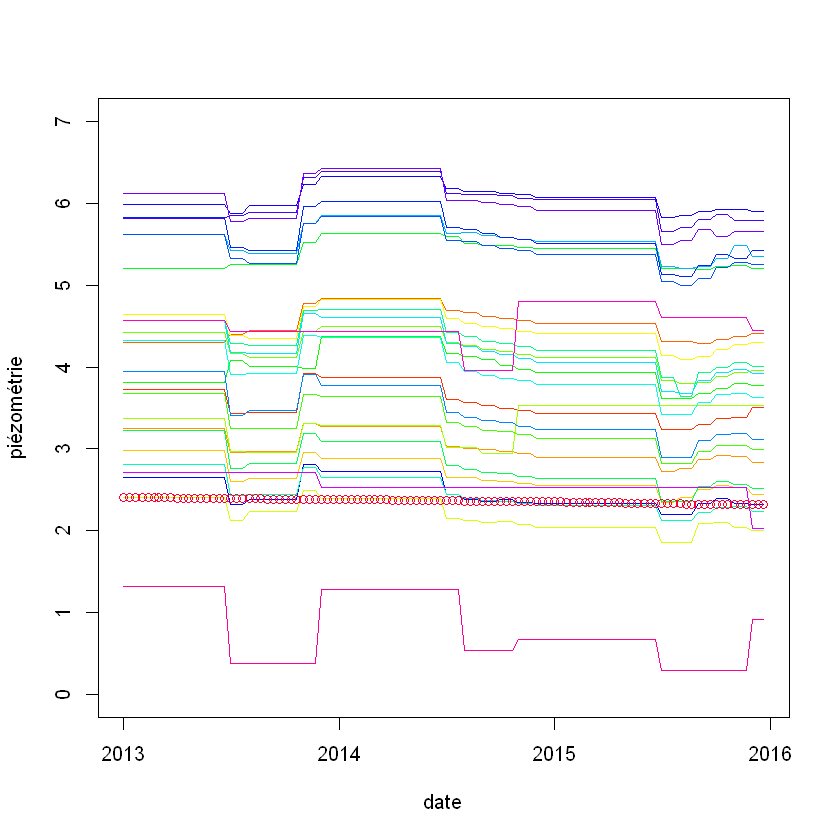

NULL
NULL
[1] "output/output_rmse//simulation 3 0.03_30.0_0.0_300.0"


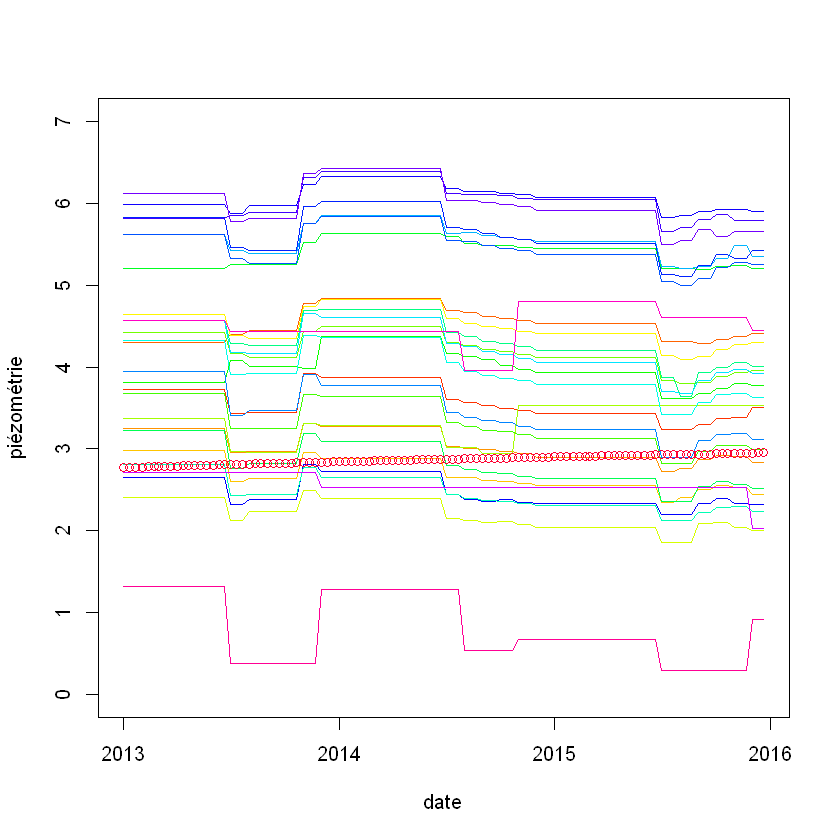

NULL
NULL


Warning message:
"Removed 108 row(s) containing missing values (geom_path)."


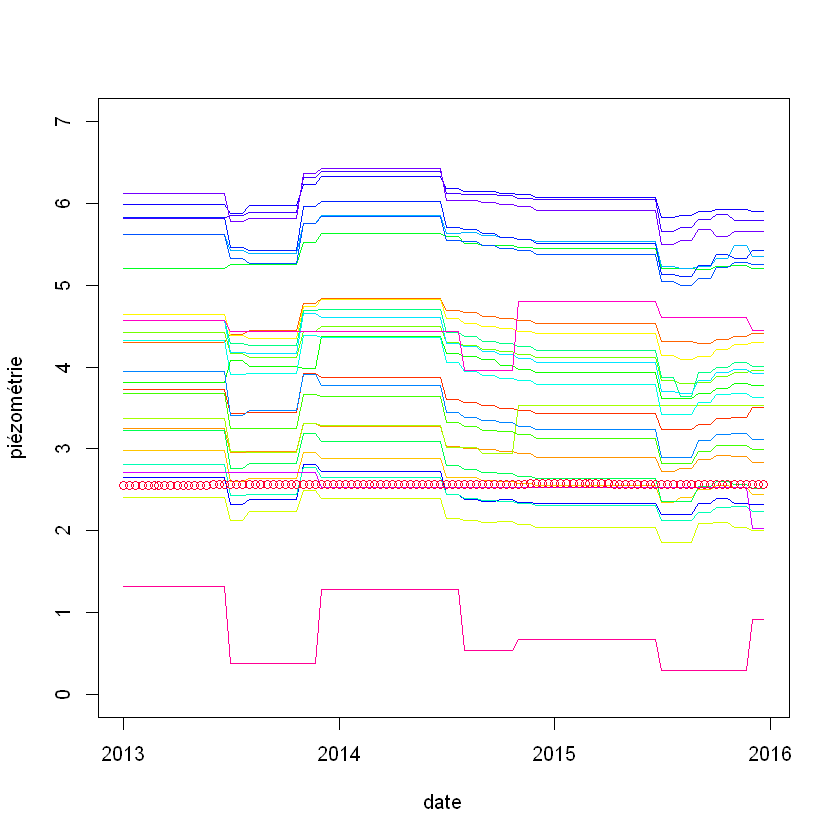

In [33]:
opti_model(getwd())

##### Var perm Optimal

In [ ]:
reso="300.0"

In [ ]:
list_indice<-Filter(function(x) grepl(reso, x),
        list.files("output/indice_par_station",
                   pattern = ".csv$"))

In [ ]:
st<-rcsv_sep(file.path("output",
    "indice_par_station",list_indice[1]))$zone

In [ ]:
list_parametre=c("consourb","moyirrigculture",
                 "varstock","resolution")

In [ ]:
for (s in st){
    
    p<-c()
    for (idc in list_indice){
    d<-rcsv_sep(file.path("output",
    "indice_par_station",idc))
        
    sr<-substr(tools::file_path_sans_ext(idc),
    14,nchar(tools::file_path_sans_ext(idc)))
            
    split_list<-(as.list(strsplit(sr, '_')[[1]]))
            
    sid <- data.frame(matrix(unlist(split_list),
                             nrow=1,
                             ncol=(length(split_list))))
    names(sid) <- list_parametre
        
    d1<-d[which(d$zone==s),c("rmsle","zone")]
    
    p<-rbind(p,cbind(sid,d1))    
    }
    write.csv2(p,file.path("output","Varp",
    paste(s,".csv",sep="")))
}

In [ ]:
stop!

##### GRAPHIQUE PAR SIMULATION

In [ ]:
df<-rcsv_sep('output/tableau_rsme.csv')

In [ ]:
list_o<-c()

for (i in 1:dim(df)[1]){
    
    o<-paste(df[i,4:7],collapse="_")
    list_o<-c(list_o,o)
}

obs<-na.omit(extract_obs())

### RSME par station

In [ ]:
barplot(all_idc$simulation_1,names.arg=rownames(all_idc),
        col=rainbow(20), las=2,ylab="RMSE",angle = 45)

In [ ]:
list_simul<-c("bilanid_500.0_-0.001_0.0_23_0.06.csv",
              "bilanid_1000.0_-0.001_30.0_43_0.06.csv",
              "bilanid_300.0_0.0_-60.0_3_0.06.csv",
              "bilanid_300.0_0.0_-60.0_43_0.06.csv",
              "bilanid_300.0_0.0_-60.0_3_0.06.csv",
              "bilanid_300.0_0.0_-60.0_43_0.03.csv",
              "bilanid_1000.0_-0.001_30.0_43_0.06.csv",
              "bilanid_1000.0_-0.001_-30.0_3_0.06.csv")

#### TEST